In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from matplotlib import rc

# Windows 예제
rc('font', family='Malgun Gothic')  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [2]:
# CSV 파일 읽기
file_path = 'trickcal_revive_reviews.csv'  # CSV 파일 경로
df = pd.read_csv(file_path, encoding='utf-8-sig')

# 데이터 확인
print("데이터프레임 정보:")
print(df.info())
print("\n상위 5개 데이터:")
print(df.head())

데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9620 entries, 0 to 9619
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  9620 non-null   object
 1   score     9620 non-null   int64 
 2   at        9620 non-null   object
 3   content   9620 non-null   object
dtypes: int64(1), object(3)
memory usage: 300.8+ KB
None

상위 5개 데이터:
     userName  score                   at  \
0  Google 사용자      5  2025-01-17 08:57:24   
1  Google 사용자      5  2025-01-17 04:28:06   
2  Google 사용자      5  2025-01-17 02:57:49   
3  Google 사용자      5  2025-01-17 00:55:52   
4  Google 사용자      5  2025-01-17 00:53:37   

                                             content  
0  게임은 재밌어요 사도들이 이쁘고 침략도 재밌는데 단한가지 불편한점이 덱을짤때 추천조...  
1  장점 - 스토리, 캐릭터성, 피라 이벤스 단점 - 그 외 나머지 단점을 장점이 씹고...  
2                                      역시 정상화는 신 정 현  
3  광고에 떴길래 해보니까 재밌어 는데 뽑기에서 란이 라는 캐릭터를 갔고 싶어는데 뽑기...  
4  스토리 재밌어요 캐릭터들도 귀엽고 개성있고 무엇보다도 아트팀에 변1

In [4]:
# 점수 분포 시각화
def visualize_score_distribution(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='score', order=sorted(df['score'].unique()))
    plt.title('Review Score Distribution', fontsize=16)
    plt.xlabel('Score', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [6]:
# 점수별 단어 빈도 비교
def analyze_words_by_score(df):
    okt = Okt()
    
    # 5점과 1점 리뷰를 각각 필터링
    score_5_reviews = ' '.join(df[df['score'] == 5]['content'].dropna())
    score_1_reviews = ' '.join(df[df['score'] == 1]['content'].dropna())

    # 명사 추출
    score_5_nouns = okt.nouns(score_5_reviews)
    score_1_nouns = okt.nouns(score_1_reviews)

    # 단어 빈도 계산
    score_5_word_counts = Counter(score_5_nouns)
    score_1_word_counts = Counter(score_1_nouns)

    # 데이터 준비
    score_5_df = pd.DataFrame(score_5_word_counts.most_common(10), columns=['Word', 'Frequency'])
    score_1_df = pd.DataFrame(score_1_word_counts.most_common(10), columns=['Word', 'Frequency'])

    # 5점 리뷰
    plt.figure(figsize=(10, 6))
    sns.barplot(data=score_5_df, x='Frequency', y='Word', palette='Blues_r')
    plt.title('Top 10 Words in 5-Star Reviews', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Word', fontsize=14)
    plt.show()

    # 1점 리뷰
    plt.figure(figsize=(10, 6))
    sns.barplot(data=score_1_df, x='Frequency', y='Word', palette='Reds_r')
    plt.title('Top 10 Words in 1-Star Reviews', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Word', fontsize=14)
    plt.show()

In [7]:
# 리뷰 길이 분포
def visualize_content_length(df):
    # 리뷰 길이 계산
    df['content_length'] = df['content'].dropna().apply(len)

    # 히스토그램 시각화
    plt.figure(figsize=(10, 6))
    plt.hist(df['content_length'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Review Content Length Distribution', fontsize=16)
    plt.xlabel('Content Length', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

In [8]:
# 워드클라우드 생성
def create_wordcloud(df, score_filter=None):
    okt = Okt()
    
    # 특정 점수만 필터링
    if score_filter:
        filtered_reviews = ' '.join(df[df['score'] == score_filter]['content'].dropna())
    else:
        filtered_reviews = ' '.join(df['content'].dropna())

    # 명사 추출 및 빈도 계산
    nouns = okt.nouns(filtered_reviews)
    word_counts = Counter(nouns)

    # 워드클라우드 생성
    font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows 한글 폰트 경로
    wc = WordCloud(
        font_path=font_path,
        width=800,
        height=400,
        background_color='white',
        max_words=200,
        max_font_size=100,
        min_font_size=10,
        random_state=42,
    ).generate_from_frequencies(word_counts)

    # 시각화
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [9]:
# 점수별 리뷰 비율 파이 차트
def visualize_score_ratios(df):
    # 점수 비율 계산
    score_ratios = df['score'].value_counts(normalize=True)

    # 파이 차트 시각화
    plt.figure(figsize=(8, 8))
    score_ratios.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Review Score Ratios', fontsize=16)
    plt.ylabel('')
    plt.show()

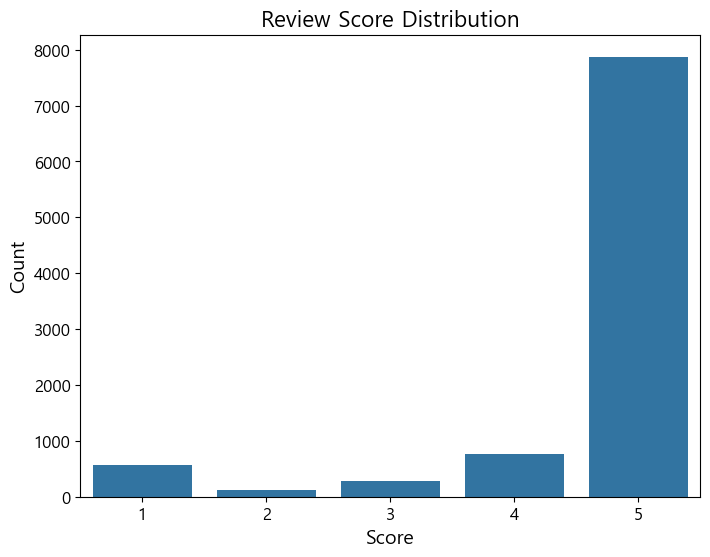

C:\Users\bisu\AppData\Local\Temp\ipykernel_19808\442042895.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=score_5_df, x='Frequency', y='Word', palette='Blues_r')


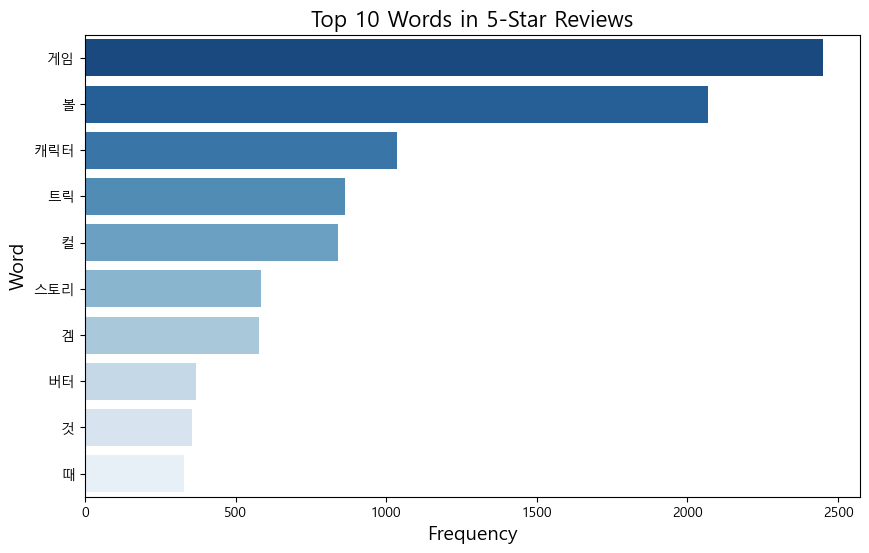

C:\Users\bisu\AppData\Local\Temp\ipykernel_19808\442042895.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=score_1_df, x='Frequency', y='Word', palette='Reds_r')


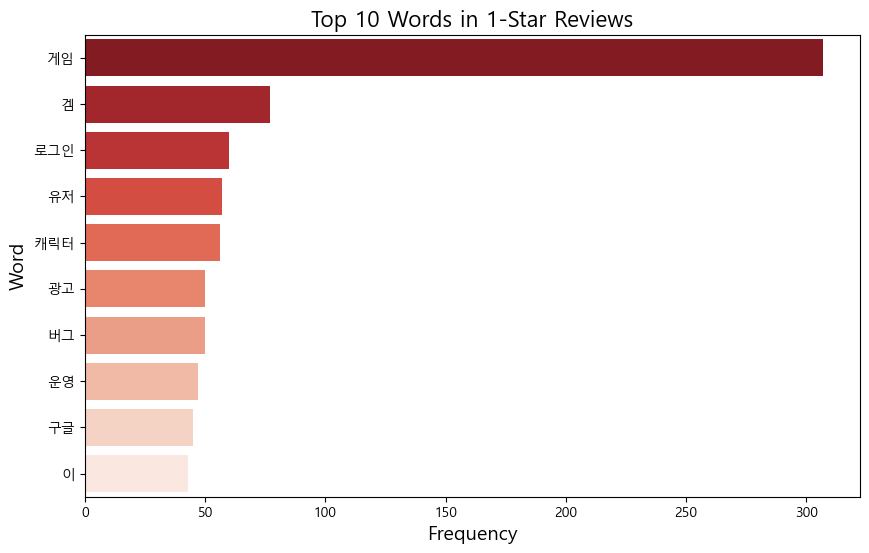

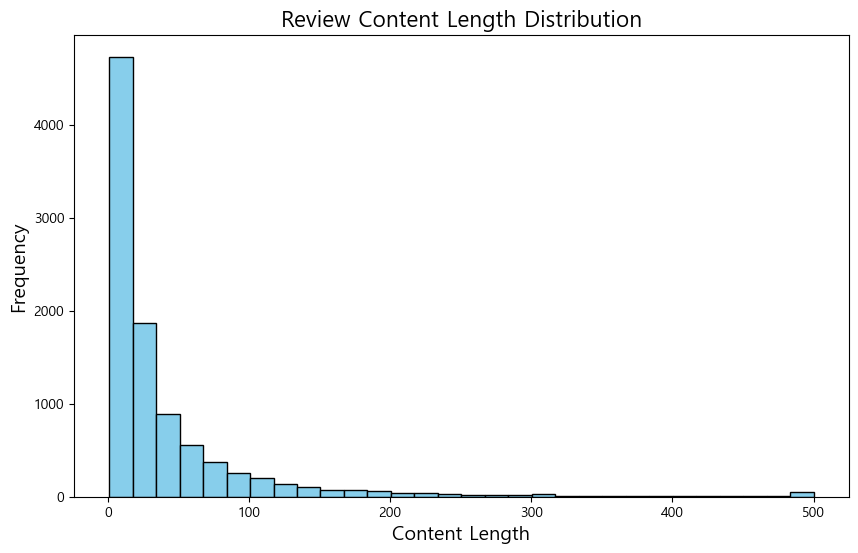

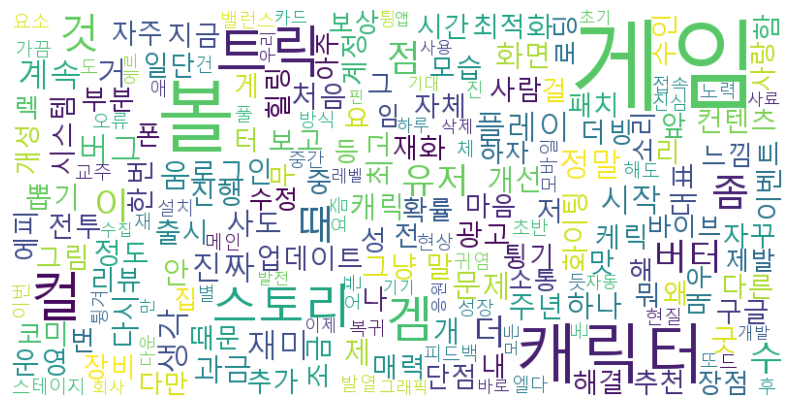

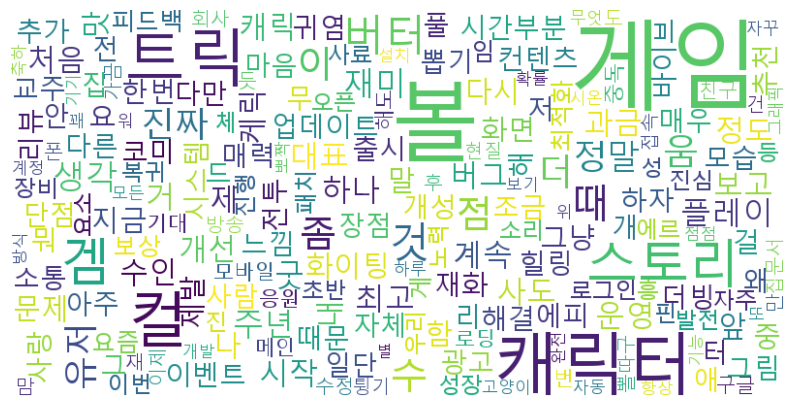

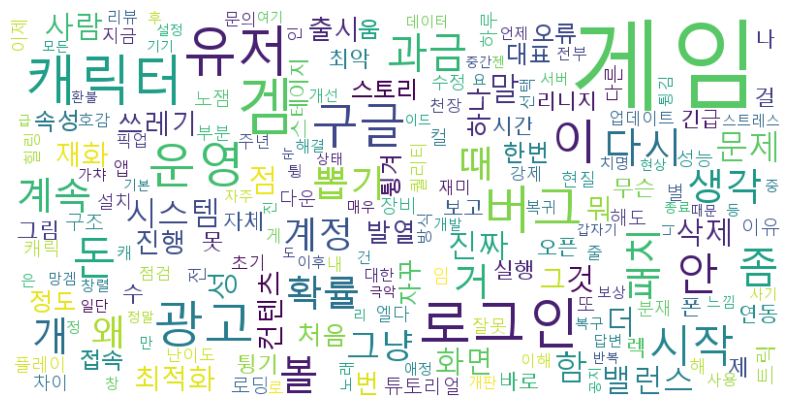

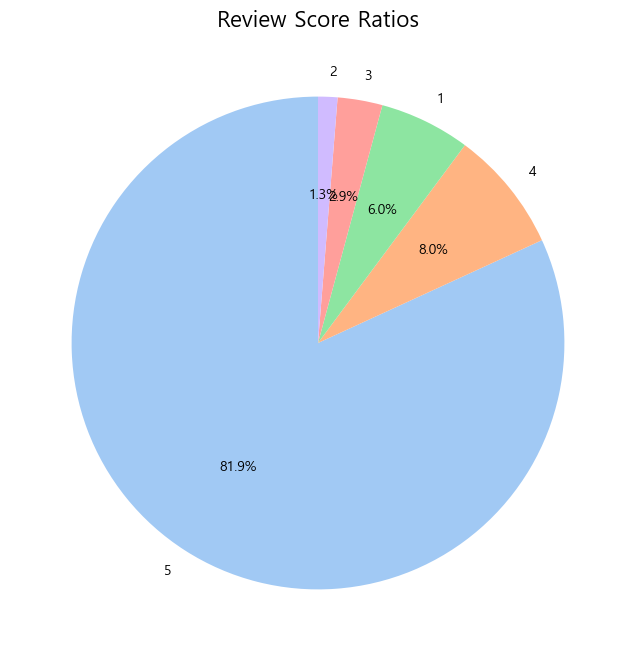

In [10]:
# 함수 호출
visualize_score_distribution(df)
analyze_words_by_score(df)
visualize_content_length(df)
create_wordcloud(df)  # 전체 워드클라우드
create_wordcloud(df, score_filter=5)  # 5점 리뷰 워드클라우드
create_wordcloud(df, score_filter=1)  # 1점 리뷰 워드클라우드
visualize_score_ratios(df)
